In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Data preparation

In [214]:
df = pd.read_csv('raw.githubusercontent.com_alexeygrigorev_mlbookcamp-code_master_chapter-02-car-price_data.csv')

In [215]:
df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [216]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [217]:
cols = ['Make', 'Model', 'Year', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Vehicle Style',
       'highway MPG', 'city mpg','MSRP']

In [218]:
df = df[cols]

In [219]:
df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Vehicle Style,Coupe,Convertible,Coupe,Coupe,Convertible
highway MPG,26,28,28,28,28
city mpg,19,19,20,18,18
MSRP,46135,40650,36350,29450,34500


In [220]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [221]:
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

In [222]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [223]:
df = df.fillna(0)

In [224]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [225]:
df['price'] = df['msrp']

In [226]:
del df['msrp']

In [227]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [229]:
# QUESTION 1

# What is the most frequent observation (mode) for the column transmission_type?

(array([2935.,    0., 8266.,    0.,    0.,  626.,    0.,   68.,    0.,
          19.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

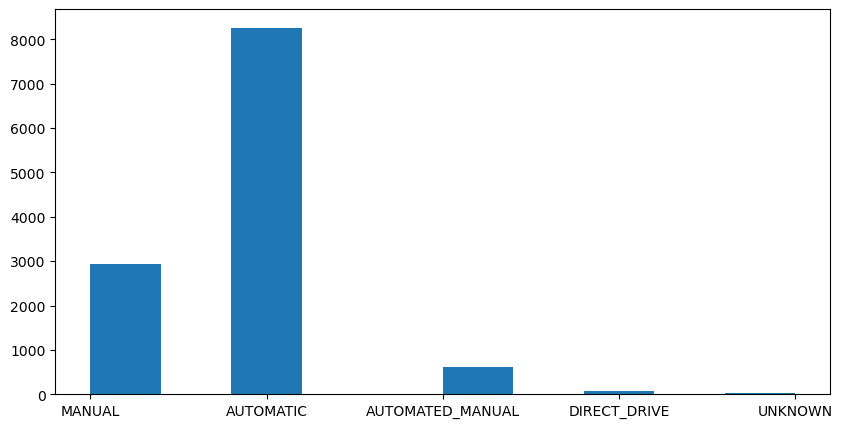

In [230]:
plt.figure(figsize = (10,5))
plt.hist(data = df, x = 'transmission_type')

# The mode is 'AUTOMATIC'

In [231]:
# QUESTION 2

# Correlation matrix for the numerical features

In [232]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [233]:
numerical = ['year', 'engine_hp','engine_cylinders','highway_mpg', 'city_mpg','price']
categorical = ['make','model','transmission_type','vehicle_style']

In [234]:
df[numerical].corr()

# 'highway_mpg' and 'city_mpg' are the two features that have the biggest correlation (0.886829)

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


In [235]:
# Make price binary

avg_price = df.price.mean()
df['above_average'] = (df['price'] > avg_price).astype(int)

In [236]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [237]:
# Split the data

from sklearn.model_selection import train_test_split

In [238]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [239]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [240]:
y_train = df_train['above_average'].values
y_test = df_test['above_average'].values
y_val = df_val['above_average'].values

In [241]:
y_price_train = df_train['price'].values
y_price_test = df_test['price'].values
y_price_val = df_val['price'].values

In [242]:
del df_train['above_average']
del df_test['above_average']
del df_val['above_average']
del df_train['price']
del df_test['price']
del df_val['price']

In [243]:
# excluded 'price'
numerical = ['year', 'engine_hp','engine_cylinders','highway_mpg', 'city_mpg']

In [76]:
# QUESTION 3

# Calculate the mutual information score between above_average and other categorical variables in our dataset. 
# Use the training set only.

from sklearn.metrics import mutual_info_score

In [87]:
round(mutual_info_score(df_full_train['make'], df_full_train['above_average']), 2)

0.24

In [88]:
round(mutual_info_score(df_full_train['model'], df_full_train['above_average']), 2)

0.46

In [89]:
round(mutual_info_score(df_full_train['transmission_type'], df_full_train['above_average']), 2)

0.02

In [90]:
round(mutual_info_score(df_full_train['vehicle_style'], df_full_train['above_average']), 2)

0.08

In [85]:
# 'transmission_type' has the lowest mutual information score

In [ ]:
# QUESTION 4

# One-hot encoding

In [91]:
from sklearn.feature_extraction import DictVectorizer

In [103]:
dv = DictVectorizer(sparse=False)

In [101]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [104]:
X_train = dv.fit_transform(train_dicts)

In [108]:
X_train.shape

(7148, 943)

In [109]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [110]:
X_val = dv.transform(val_dicts)

In [111]:
# Training logistic regression

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [114]:
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [117]:
model.coef_[0].round(3)

array([ 7.200e-02, -9.700e-02,  3.600e-02,  5.000e-03,  1.314e+00,
        1.654e+00,  5.470e-01,  2.608e+00,  2.159e+00,  1.670e-01,
        0.000e+00, -4.740e-01,  2.044e+00, -1.242e+00, -1.334e+00,
       -3.758e+00, -4.670e-01,  3.400e-01, -1.678e+00, -8.200e-01,
        5.490e-01, -2.000e-01, -1.196e+00, -2.660e+00,  3.090e-01,
       -1.508e+00,  1.000e-02,  1.947e+00,  1.235e+00,  1.182e+00,
        3.917e+00,  9.700e-01,  4.000e-03, -1.615e+00,  0.000e+00,
        8.960e-01, -1.875e+00, -8.260e-01, -1.328e+00, -2.900e-01,
       -3.024e+00,  2.030e+00,  8.850e-01,  9.000e-01, -2.160e-01,
        2.980e-01, -2.583e+00, -1.820e+00,  3.083e+00, -9.460e-01,
       -5.980e-01,  1.100e+00, -1.212e+00, -3.450e-01, -4.300e-02,
       -8.000e-03, -2.000e-03, -1.046e+00, -8.350e-01, -2.000e-03,
       -3.000e-03, -3.000e-03, -1.830e-01, -3.700e-02,  1.503e+00,
        3.490e-01, -4.060e-01, -6.300e-02, -1.510e-01, -1.420e-01,
       -0.000e+00, -1.400e-02, -9.230e-01,  1.430e-01,  6.400e

In [121]:
y_pred = model.predict_proba(X_val)[:, 1]

In [122]:
above_avarage_decision = (y_pred >= 0.5)

In [126]:
(y_val == above_avarage_decision.astype(int)).mean()

0.9433487201007134

In [127]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = above_avarage_decision.astype(int)
df_pred['actual'] = y_val

In [128]:
df_pred['correct'] = df_pred['prediction'] == df_pred['actual']

In [131]:
round(df_pred['correct'].mean(), 2)
# accuracy is about 0.94

0.94

In [ ]:
# QUESTION 5

# find the least useful feature using the feature elimination technique

In [132]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

C:\Users\Home-desktop\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'city_mpg': 0.072,
 'engine_cylinders': -0.097,
 'engine_hp': 0.036,
 'highway_mpg': 0.005,
 'make=Acura': 1.314,
 'make=Alfa Romeo': 1.654,
 'make=Aston Martin': 0.547,
 'make=Audi': 2.608,
 'make=BMW': 2.159,
 'make=Bentley': 0.167,
 'make=Bugatti': 0.0,
 'make=Buick': -0.474,
 'make=Cadillac': 2.044,
 'make=Chevrolet': -1.242,
 'make=Chrysler': -1.334,
 'make=Dodge': -3.758,
 'make=FIAT': -0.467,
 'make=Ferrari': 0.34,
 'make=Ford': -1.678,
 'make=GMC': -0.82,
 'make=Genesis': 0.549,
 'make=HUMMER': -0.2,
 'make=Honda': -1.196,
 'make=Hyundai': -2.66,
 'make=Infiniti': 0.309,
 'make=Kia': -1.508,
 'make=Lamborghini': 0.01,
 'make=Land Rover': 1.947,
 'make=Lexus': 1.235,
 'make=Lincoln': 1.182,
 'make=Lotus': 3.917,
 'make=Maserati': 0.97,
 'make=Maybach': 0.004,
 'make=Mazda': -1.615,
 'make=McLaren': 0.0,
 'make=Mercedes-Benz': 0.896,
 'make=Mitsubishi': -1.875,
 'make=Nissan': -0.826,
 'make=Oldsmobile': -1.328,
 'make=Plymouth': -0.29,
 'make=Pontiac': -3.024,
 'make=Porsche': 

In [134]:
w0 = model.intercept_[0]
w0

-0.31294698926396447

In [180]:
features = [categorical + numerical]
features

[['make',
  'model',
  'transmission_type',
  'vehicle_style',
  'year',
  'engine_hp',
  'engine_cylinders',
  'highway_mpg',
  'city_mpg']]

In [195]:
# excluded 'make' feature

# One-hot encoding

dv_1 = DictVectorizer(sparse=False)

df_1_train = df_train.drop(['make'], axis=1)
df_1_test = df_test.drop(['make'], axis=1)
df_1_val = df_val.drop(['make'], axis=1)

train_1_dicts = df_1_train[['model',  'transmission_type',  'vehicle_style',  'year',
  'engine_hp',  'engine_cylinders',  'highway_mpg',  'city_mpg']].to_dict(orient='records')

X_1_train = dv_1.fit_transform(train_1_dicts)
X_1_train.shape

val_1_dicts = df_1_val[['model',  'transmission_type',  'vehicle_style',  'year',
  'engine_hp',  'engine_cylinders',  'highway_mpg',  'city_mpg']].to_dict(orient='records')
X_1_val = dv_1.transform(val_1_dicts)

# Training logistic regression

model_1 = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

model_1.fit(X_1_train, y_train)

model_1.coef_[0].round(3)

y_1_pred = model_1.predict_proba(X_1_val)[:, 1]

above_avarage_decision_1 = (y_1_pred >= 0.5)

(y_val == above_avarage_decision_1.astype(int)).mean()

df_pred_1 = pd.DataFrame()
df_pred_1['probability'] = y_1_pred
df_pred_1['prediction'] = above_avarage_decision_1.astype(int)
df_pred_1['actual'] = y_val

df_pred_1['correct'] = df_pred_1['prediction'] == df_pred_1['actual']

round(df_pred['correct'].mean() - df_pred_1['correct'].mean(), 3)
# difference is about -0.003

-0.003

In [196]:
# excluded 'model' feature

# One-hot encoding
dv_2 = DictVectorizer(sparse=False)

df_2_train = df_train.drop(['model'], axis=1)
df_2_test = df_test.drop(['model'], axis=1)
df_2_val = df_val.drop(['model'], axis=1)

train_2_dicts = df_2_train[['make',  'transmission_type',  'vehicle_style',  'year',
  'engine_hp',  'engine_cylinders',  'highway_mpg',  'city_mpg']].to_dict(orient='records')

X_2_train = dv_2.fit_transform(train_2_dicts)

val_2_dicts = df_2_val[['make',  'transmission_type',  'vehicle_style',  'year',
  'engine_hp',  'engine_cylinders',  'highway_mpg',  'city_mpg']].to_dict(orient='records')
X_2_val = dv_2.transform(val_2_dicts)

# Training logistic regression

model_2 = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

model_2.fit(X_2_train, y_train)

model_2.coef_[0].round(3)

y_2_pred = model_2.predict_proba(X_2_val)[:, 1]

above_avarage_decision_2 = (y_2_pred >= 0.5)

(y_val == above_avarage_decision_2.astype(int)).mean()

df_pred_2 = pd.DataFrame()
df_pred_2['probability'] = y_2_pred
df_pred_2['prediction'] = above_avarage_decision_2.astype(int)
df_pred_2['actual'] = y_val

df_pred_2['correct'] = df_pred_2['prediction'] == df_pred_2['actual']

round(df_pred['correct'].mean() - df_pred_2['correct'].mean(), 3)
# difference is about 0.019

0.019

In [198]:
# excluded 'transmission_type' feature

# One-hot encoding
dv_3 = DictVectorizer(sparse=False)

df_3_train = df_train.drop(['transmission_type'], axis=1)
df_3_test = df_test.drop(['transmission_type'], axis=1)
df_3_val = df_val.drop(['transmission_type'], axis=1)

train_3_dicts = df_3_train[['make',  'model',  'vehicle_style',  'year',  'engine_hp',
  'engine_cylinders',  'highway_mpg',  'city_mpg']].to_dict(orient='records')

X_3_train = dv_3.fit_transform(train_3_dicts)

val_3_dicts = df_3_val[['make',  'model',  'vehicle_style',  'year',  'engine_hp',
  'engine_cylinders',  'highway_mpg',  'city_mpg']].to_dict(orient='records')
X_3_val = dv_3.transform(val_3_dicts)

# Training logistic regression

model_3 = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

model_3.fit(X_3_train, y_train)

model_3.coef_[0].round(3)

y_3_pred = model_3.predict_proba(X_3_val)[:, 1]

above_avarage_decision_3 = (y_3_pred >= 0.5)

(y_val == above_avarage_decision_3.astype(int)).mean()

df_pred_3 = pd.DataFrame()
df_pred_3['probability'] = y_3_pred
df_pred_3['prediction'] = above_avarage_decision_3.astype(int)
df_pred_3['actual'] = y_val

df_pred_3['correct'] = df_pred_3['prediction'] == df_pred_3['actual']

round(df_pred['correct'].mean() - df_pred_3['correct'].mean(), 3)
# difference is about 0.002

0.002

In [199]:
# excluded 'vehicle_style' feature

# One-hot encoding
dv_4 = DictVectorizer(sparse=False)

df_4_train = df_train.drop(['vehicle_style'], axis=1)
df_4_test = df_test.drop(['vehicle_style'], axis=1)
df_4_val = df_val.drop(['vehicle_style'], axis=1)

train_4_dicts = df_4_train[['make',  'model',  'transmission_type', 'year',  'engine_hp',
  'engine_cylinders',  'highway_mpg',  'city_mpg']].to_dict(orient='records')

X_4_train = dv_4.fit_transform(train_4_dicts)

val_4_dicts = df_4_val[['make',  'model',  'transmission_type',  'year',  'engine_hp',
  'engine_cylinders',  'highway_mpg',  'city_mpg']].to_dict(orient='records')
X_4_val = dv_4.transform(val_4_dicts)

# Training logistic regression

model_4 = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

model_4.fit(X_4_train, y_train)

model_4.coef_[0].round(3)

y_4_pred = model_4.predict_proba(X_4_val)[:, 1]

above_avarage_decision_4 = (y_4_pred >= 0.5)

(y_val == above_avarage_decision_4.astype(int)).mean()

df_pred_4 = pd.DataFrame()
df_pred_4['probability'] = y_4_pred
df_pred_4['prediction'] = above_avarage_decision_4.astype(int)
df_pred_4['actual'] = y_val

df_pred_4['correct'] = df_pred_4['prediction'] == df_pred_4['actual']

round(df_pred['correct'].mean() - df_pred_4['correct'].mean(), 3)
# difference is about 0.011

0.011

In [200]:
# excluded 'year' feature

# One-hot encoding
dv_5 = DictVectorizer(sparse=False)

df_5_train = df_train.drop(['year'], axis=1)
df_5_test = df_test.drop(['year'], axis=1)
df_5_val = df_val.drop(['year'], axis=1)

train_5_dicts = df_5_train[['make',  'model',  'transmission_type','vehicle_style' ,  'engine_hp',
  'engine_cylinders',  'highway_mpg',  'city_mpg']].to_dict(orient='records')

X_5_train = dv_5.fit_transform(train_5_dicts)

val_5_dicts = df_5_val[['make',  'model',  'transmission_type',  'vehicle_style',  'engine_hp',
  'engine_cylinders',  'highway_mpg',  'city_mpg']].to_dict(orient='records')
X_5_val = dv_5.transform(val_5_dicts)

# Training logistic regression

model_5 = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

model_5.fit(X_5_train, y_train)

model_5.coef_[0].round(3)

y_5_pred = model_5.predict_proba(X_5_val)[:, 1]

above_avarage_decision_5 = (y_5_pred >= 0.5)

(y_val == above_avarage_decision_5.astype(int)).mean()

df_pred_5 = pd.DataFrame()
df_pred_5['probability'] = y_5_pred
df_pred_5['prediction'] = above_avarage_decision_5.astype(int)
df_pred_5['actual'] = y_val

df_pred_5['correct'] = df_pred_5['prediction'] == df_pred_5['actual']

round(df_pred['correct'].mean() - df_pred_5['correct'].mean(), 3)
# difference is about -0.005

-0.005

In [201]:
# excluded 'engine_hp' feature

# One-hot encoding
dv_6 = DictVectorizer(sparse=False)

df_6_train = df_train.drop(['engine_hp'], axis=1)
df_6_test = df_test.drop(['engine_hp'], axis=1)
df_6_val = df_val.drop(['engine_hp'], axis=1)

train_6_dicts = df_6_train[['make',  'model',  'transmission_type','vehicle_style' ,  'year',
  'engine_cylinders',  'highway_mpg',  'city_mpg']].to_dict(orient='records')

X_6_train = dv_6.fit_transform(train_6_dicts)

val_6_dicts = df_6_val[['make',  'model',  'transmission_type',  'vehicle_style',  'year',
  'engine_cylinders',  'highway_mpg',  'city_mpg']].to_dict(orient='records')
X_6_val = dv_6.transform(val_6_dicts)

# Training logistic regression

model_6 = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

model_6.fit(X_6_train, y_train)

model_6.coef_[0].round(3)

y_6_pred = model_6.predict_proba(X_6_val)[:, 1]

above_avarage_decision_6 = (y_6_pred >= 0.5)

(y_val == above_avarage_decision_6.astype(int)).mean()

df_pred_6 = pd.DataFrame()
df_pred_6['probability'] = y_6_pred
df_pred_6['prediction'] = above_avarage_decision_6.astype(int)
df_pred_6['actual'] = y_val

df_pred_6['correct'] = df_pred_6['prediction'] == df_pred_6['actual']

round(df_pred['correct'].mean() - df_pred_6['correct'].mean(), 3)
# difference is about 0.02

0.02

In [202]:
# excluded 'engine_cylinders' feature 

# One-hot encoding
dv_7 = DictVectorizer(sparse=False)

df_7_train = df_train.drop(['engine_cylinders'], axis=1)
df_7_test = df_test.drop(['engine_cylinders'], axis=1)
df_7_val = df_val.drop(['engine_cylinders'], axis=1)

train_7_dicts = df_7_train[['make',  'model',  'transmission_type','vehicle_style' ,  'year',
  'engine_hp',  'highway_mpg',  'city_mpg']].to_dict(orient='records')

X_7_train = dv_7.fit_transform(train_7_dicts)

val_7_dicts = df_7_val[['make',  'model',  'transmission_type',  'vehicle_style',  'year',
  'engine_hp',  'highway_mpg',  'city_mpg']].to_dict(orient='records')
X_7_val = dv_7.transform(val_7_dicts)

# Training logistic regression

model_7 = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

model_7.fit(X_7_train, y_train)

model_7.coef_[0].round(3)

y_7_pred = model_7.predict_proba(X_7_val)[:, 1]

above_avarage_decision_7 = (y_7_pred >= 0.5)

(y_val == above_avarage_decision_7.astype(int)).mean()

df_pred_7 = pd.DataFrame()
df_pred_7['probability'] = y_7_pred
df_pred_7['prediction'] = above_avarage_decision_7.astype(int)
df_pred_7['actual'] = y_val

df_pred_7['correct'] = df_pred_7['prediction'] == df_pred_7['actual']

round(df_pred['correct'].mean() - df_pred_7['correct'].mean(), 3)
# difference is about -0.004

-0.004

In [203]:
# excluded 'highway_mpg' feature 

# One-hot encoding
dv_8 = DictVectorizer(sparse=False)

df_8_train = df_train.drop(['highway_mpg'], axis=1)
df_8_test = df_test.drop(['highway_mpg'], axis=1)
df_8_val = df_val.drop(['highway_mpg'], axis=1)

train_8_dicts = df_8_train[['make',  'model',  'transmission_type','vehicle_style' ,  'year',
  'engine_hp',  'engine_cylinders',  'city_mpg']].to_dict(orient='records')

X_8_train = dv_8.fit_transform(train_8_dicts)

val_8_dicts = df_8_val[['make',  'model',  'transmission_type',  'vehicle_style',  'year',
  'engine_hp',  'engine_cylinders',  'city_mpg']].to_dict(orient='records')
X_8_val = dv_8.transform(val_8_dicts)

# Training logistic regression

model_8 = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

model_8.fit(X_8_train, y_train)

model_8.coef_[0].round(3)

y_8_pred = model_8.predict_proba(X_8_val)[:, 1]

above_avarage_decision_8 = (y_8_pred >= 0.5)

(y_val == above_avarage_decision_8.astype(int)).mean()

df_pred_8 = pd.DataFrame()
df_pred_8['probability'] = y_8_pred
df_pred_8['prediction'] = above_avarage_decision_8.astype(int)
df_pred_8['actual'] = y_val

df_pred_8['correct'] = df_pred_8['prediction'] == df_pred_8['actual']

round(df_pred['correct'].mean() - df_pred_8['correct'].mean(), 3)
# difference is about -0.003

-0.003

In [204]:
# excluded  feature 

# One-hot encoding
dv_9 = DictVectorizer(sparse=False)

df_9_train = df_train.drop(['city_mpg'], axis=1)
df_9_test = df_test.drop(['city_mpg'], axis=1)
df_9_val = df_val.drop(['city_mpg'], axis=1)

train_9_dicts = df_9_train[['make',  'model',  'transmission_type','vehicle_style' ,  'year',
  'engine_hp',  'engine_cylinders', 'highway_mpg' ]].to_dict(orient='records')

X_9_train = dv_9.fit_transform(train_9_dicts)

val_9_dicts = df_9_val[['make',  'model',  'transmission_type',  'vehicle_style',  'year',
  'engine_hp',  'engine_cylinders', 'highway_mpg']].to_dict(orient='records')
X_9_val = dv_9.transform(val_9_dicts)

# Training logistic regression

model_9 = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

model_9.fit(X_9_train, y_train)

model_9.coef_[0].round(3)

y_9_pred = model_9.predict_proba(X_9_val)[:, 1]

above_avarage_decision_9 = (y_9_pred >= 0.5)

(y_val == above_avarage_decision_9.astype(int)).mean()

df_pred_9 = pd.DataFrame()
df_pred_9['probability'] = y_9_pred
df_pred_9['prediction'] = above_avarage_decision_9.astype(int)
df_pred_9['actual'] = y_val

df_pred_9['correct'] = df_pred_9['prediction'] == df_pred_9['actual']

round(df_pred['correct'].mean() - df_pred_9['correct'].mean(), 3)
# difference is about 0.011

0.011

In [ ]:
# Which of following feature has the smallest difference?

# year -0.005
# engine_hp  0.02
# transmission_type 0.002 !
# city_mpg  0.011